<a href="https://colab.research.google.com/github/Praveenkangadi/Final-Model/blob/main/LSTM_Model_Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras.models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
start = '2012-01-01'
end = '2024-6-30'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700
2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700
2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700
2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400


In [ ]:
data = data.reset_index()
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [ ]:
data = data.drop(['Date','Adj Close'],axis = 1)
data.head()

,Open,High,Low,Close,Volume
0,16.262545,16.641375,16.248346,16.573130,147611217
1,16.563665,16.693678,16.453827,16.644611,114989399
2,16.491436,16.537264,16.344486,16.413727,131808205
3,16.417213,16.438385,16.184088,16.189817,108119746
4,16.102144,16.114599,15.472754,15.503389,233776981


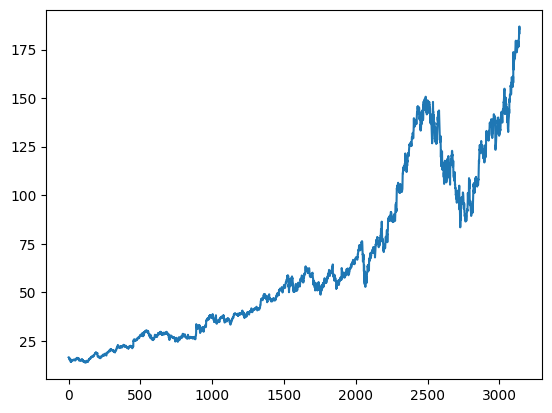

In [ ]:
plt.plot(data.Close)

In [ ]:
data


,Open,High,Low,Close,Volume
0,16.262545,16.641375,16.248346,16.573130,147611217
1,16.563665,16.693678,16.453827,16.644611,114989399
2,16.491436,16.537264,16.344486,16.413727,131808205
3,16.417213,16.438385,16.184088,16.189817,108119746
4,16.102144,16.114599,15.472754,15.503389,233776981
...,...,...,...,...,...
3137,181.279999,182.080002,180.229996,180.789993,18198300
3138,181.145004,185.750000,181.104996,185.580002,18917700
3139,184.199997,185.929993,183.990005,185.369995,13375700
3140,185.645004,187.500000,185.449997,186.860001,13025700


In [ ]:
ma100 = data.Close.rolling(100).mean()

In [ ]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3137    158.678900
3138    159.116700
3139    159.543299
3140    159.976499
3141    160.361400
Name: Close, Length: 3142, dtype: float64

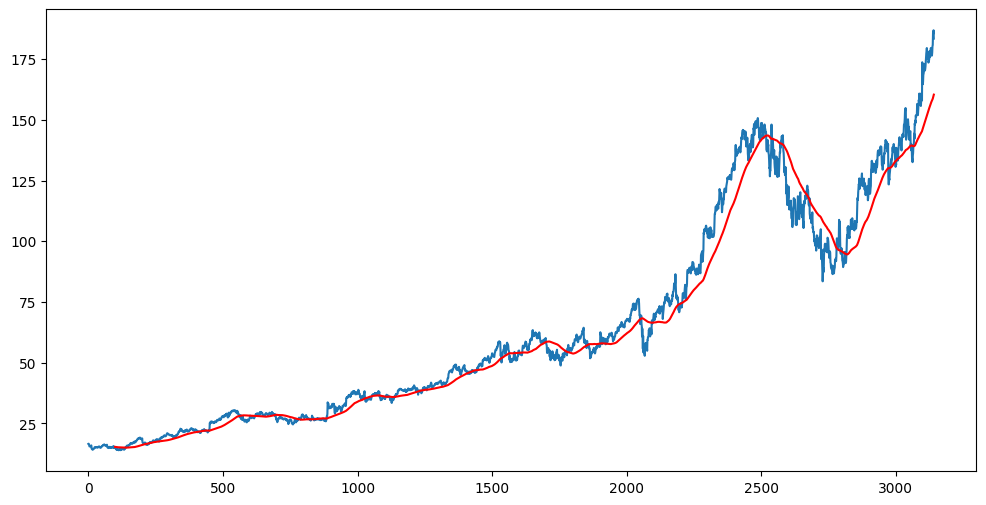

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3137    148.11630
3138    148.36320
3139    148.60405
3140    148.84965
3141    149.08640
Name: Close, Length: 3142, dtype: float64

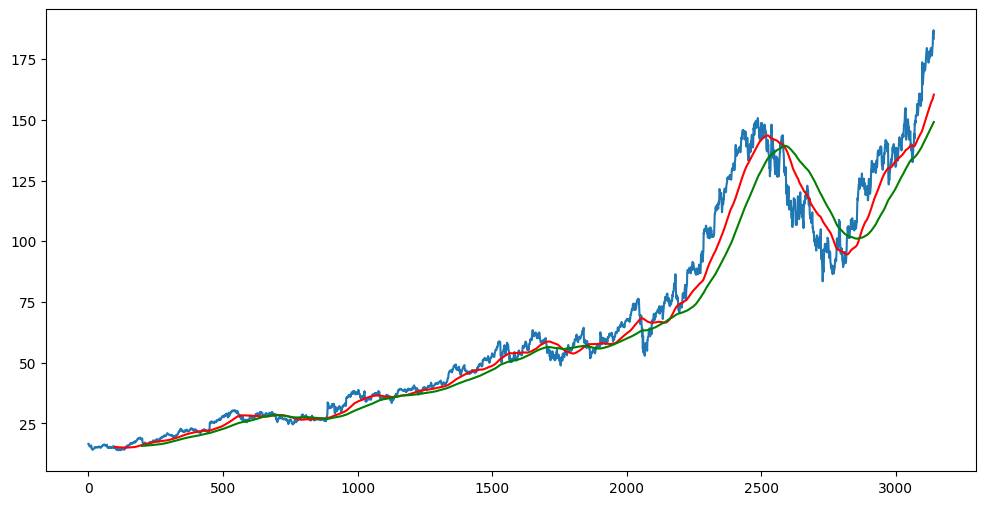

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
data.shape

(3142, 5)

In [ ]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(2199, 1)
(943, 1)


In [ ]:
data_training.head()


,Close
0,16.573130
1,16.644611
2,16.413727
3,16.189817
4,15.503389


In [ ]:
data_testing.head()

,Close
2199,73.466499
2200,73.480003
2201,74.504501
2202,72.920998
2203,74.301003


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03654398],
       [0.03753007],
       [0.03434501],
       ...,
       [0.79308158],
       [0.80457978],
       [0.81807127]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train,y_train = np.array(x_train), np.array(y_train)

ML MODEL


In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
66/66 [==============================] - 23s 252ms/step - loss: 0.0250
Epoch 2/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0065
Epoch 3/50
66/66 [==============================] - 18s 271ms/step - loss: 0.0066
Epoch 4/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 17s 252ms/step - loss: 0.0051
Epoch 6/50
66/66 [==============================] - 17s 261ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 17s 261ms/step - loss: 0.0045
Epoch 8/50
66/66 [==============================] - 17s 252ms/step - loss: 0.0047
Epoch 9/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0042
Epoch 10/50
66/66 [==============================] - 18s 275ms/step - loss: 0.0044
Epoch 11/50
66/66 [==============================] - 17s 253ms/step - loss: 0.0042
Epoch 12/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0035
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
